In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import random
import shutil
import numpy as np

In [2]:
# Set random seed for reproducibility
random.seed(42)
tf.random.set_seed(42)

# Function to create train, validation, and test sets
def create_dataset_splits(source_dir, train_dir, val_dir, test_dir, num_train, num_val, num_test):
    for dir in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(dir, 'cats'), exist_ok=True)
        os.makedirs(os.path.join(dir, 'dogs'), exist_ok=True)

    for animal in ['cat', 'dog']:
        animal_files = [f for f in os.listdir(source_dir) if f.startswith(animal)]
        random.shuffle(animal_files)

        for i, file in enumerate(animal_files):
            if i < num_train:
                shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, f'{animal}s', file))
            elif i < num_train + num_val:
                shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, f'{animal}s', file))
            elif i < num_train + num_val + num_test:
                shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, f'{animal}s', file))
            else:
                break

    print(f"Train set: {len(os.listdir(os.path.join(train_dir, 'cats'))) + len(os.listdir(os.path.join(train_dir, 'dogs')))} images")
    print(f"Validation set: {len(os.listdir(os.path.join(val_dir, 'cats'))) + len(os.listdir(os.path.join(val_dir, 'dogs')))} images")
    print(f"Test set: {len(os.listdir(os.path.join(test_dir, 'cats'))) + len(os.listdir(os.path.join(test_dir, 'dogs')))} images")


# Create dataset splits
source_dir = 'D:/Test/Deep_Learning/Assignment_3/dogs-vs-cats/train'
train_dir = 'D:/Test/Deep_Learning/Assignment_3/dataset/train'
val_dir = 'D:/Test/Deep_Learning/Assignment_3/dataset/validation'
test_dir = 'D:/Test/Deep_Learning/Assignment_3/dataset/test'

create_dataset_splits(source_dir, train_dir, val_dir, test_dir, 2000, 1000, 1000)


Train set: 4000 images
Validation set: 2000 images
Test set: 2000 images


In [3]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

validation_generator = val_test_datagen.flow_from_directory(val_dir, target_size=(150, 150),
                                                            batch_size=32, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                      batch_size=32, class_mode='binary')


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/30


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 613ms/step - accuracy: 0.4982 - loss: 0.7203 - val_accuracy: 0.5050 - val_loss: 0.6901
Epoch 2/30
 25/100 ━━━━━━━━━━━━━━━━━━━━ 34s 454ms/step - accuracy: 0.5041 - loss: 0.6912

C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.5207 - loss: 0.6904 - val_accuracy: 0.5925 - val_loss: 0.6763
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 625ms/step - accuracy: 0.5729 - loss: 0.6762 - val_accuracy: 0.5955 - val_loss: 0.6626
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.5638 - loss: 0.6697 - val_accuracy: 0.5805 - val_loss: 0.6845
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 650ms/step - accuracy: 0.6019 - loss: 0.6575 - val_accuracy: 0.5920 - val_loss: 0.6534
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.5982 - loss: 0.6529 - val_accuracy: 0.6050 - val_loss: 0.6417
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 638ms/step - accuracy: 0.6134 - loss: 0.6574 - val_accuracy: 0.6045 - val_loss: 0.6482
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.6437 - loss: 0.6358 - val_accuracy: 0.5875 - val_loss: 0.6617
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 672ms/step - accuracy: 0.5987 - loss: 0.6624 - val

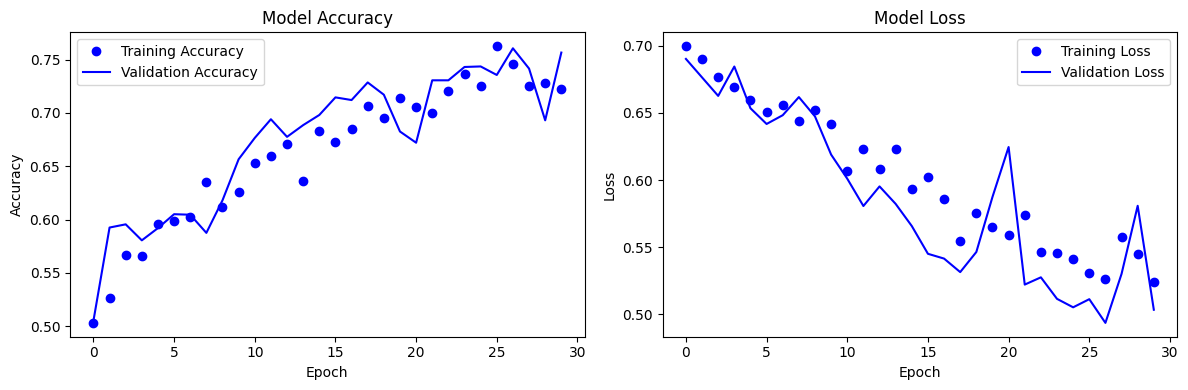

Best epoch: 27
Best validation accuracy: 0.7605


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7711 - loss: 0.4725
Test accuracy: 0.7640


In [7]:

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='Training Loss')
plt.plot(history.history['val_loss'],'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Find the best epoch
best_epoch = np.argmax(history.history['val_accuracy']) + 1
print(f"Best epoch: {best_epoch}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

### Problem 1 - Model with L1 Regularization

In [8]:
from keras import regularizers

# Model definition
model_reg = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_reg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history_reg = model_reg.fit(train_generator, steps_per_epoch=100, epochs=15, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 754ms/step - accuracy: 0.5312 - loss: 0.7613 - val_accuracy: 0.6015 - val_loss: 0.6930
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.5865 - loss: 0.7135 - val_accuracy: 0.5970 - val_loss: 0.6948
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 749ms/step - accuracy: 0.5734 - loss: 0.7105 - val_accuracy: 0.6035 - val_loss: 0.6904
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.5981 - loss: 0.6979 - val_accuracy: 0.6175 - val_loss: 0.7194
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 742ms/step - accuracy: 0.5813 - loss: 0.7057 - val_accuracy: 0.5905 - val_loss: 0.6902
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.6124 - loss: 0.6825 - val_accuracy: 0.5490 - val_loss: 0.7115
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 753ms/step - accuracy: 0.5881 - loss: 0.7140 - val_accuracy: 0.5585 - val_loss: 0.7172
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.6097 - loss: 0

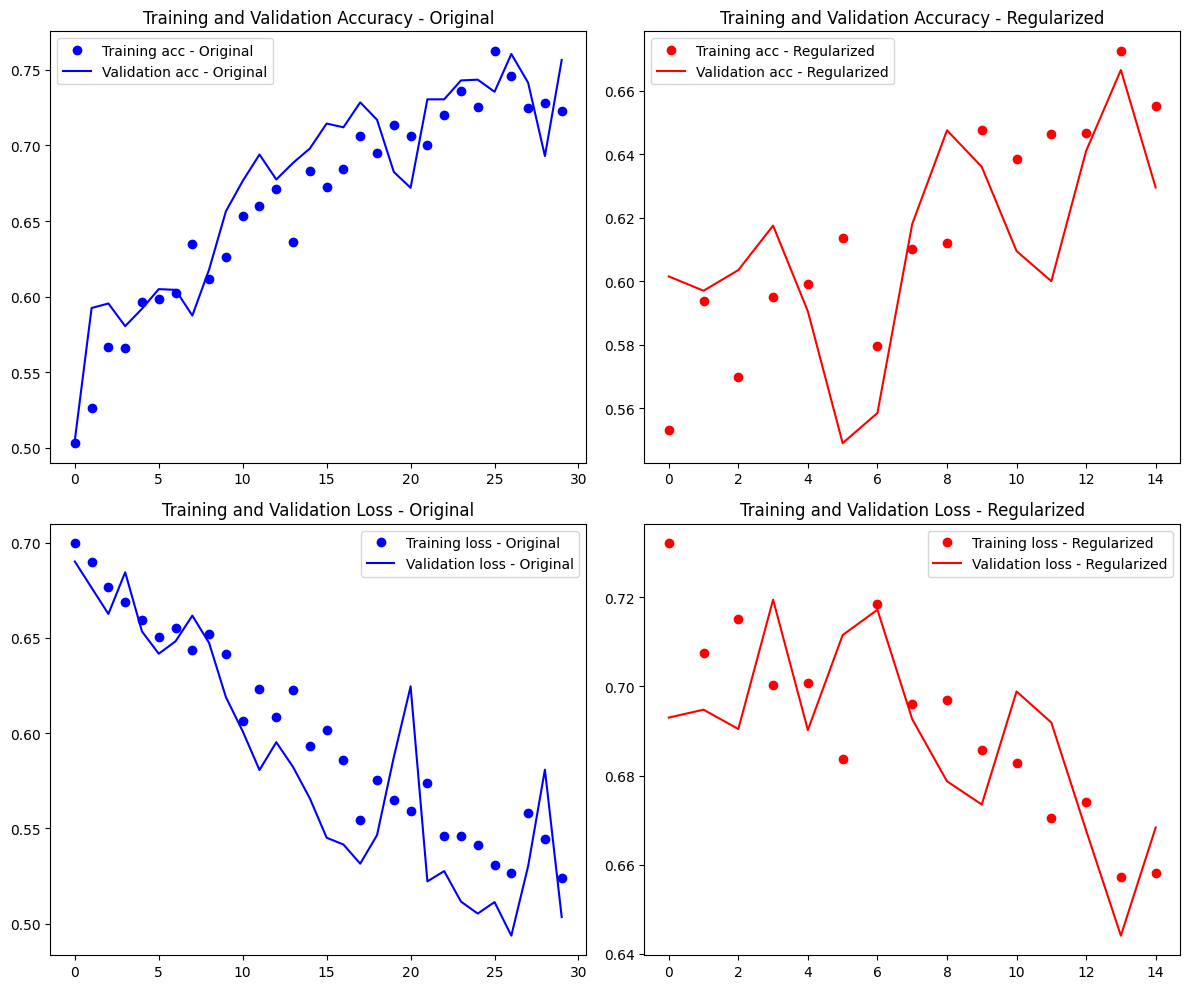

In [12]:
import matplotlib.pyplot as plt

# Original model data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Regularized model data
acc_reg = history_reg.history['accuracy']
val_acc_reg = history_reg.history['val_accuracy']
loss_reg = history_reg.history['loss']
val_loss_reg = history_reg.history['val_loss']

# Define separate epoch ranges
epochs_orig = range(len(acc))  # 30 epochs for the original model
epochs_reg = range(len(acc_reg))  # 15 epochs for the regularized model

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Training and validation accuracy for the original model
axs[0, 0].plot(epochs_orig, acc, 'bo', label='Training acc - Original')
axs[0, 0].plot(epochs_orig, val_acc, 'b', label='Validation acc - Original')
axs[0, 0].set_title('Training and Validation Accuracy - Original')
axs[0, 0].legend()

# Training and validation accuracy for the regularized model
axs[0, 1].plot(epochs_reg, acc_reg, 'ro', label='Training acc - Regularized')
axs[0, 1].plot(epochs_reg, val_acc_reg, 'r', label='Validation acc - Regularized')
axs[0, 1].set_title('Training and Validation Accuracy - Regularized')
axs[0, 1].legend()

# Training and validation loss for the original model
axs[1, 0].plot(epochs_orig, loss, 'bo', label='Training loss - Original')
axs[1, 0].plot(epochs_orig, val_loss, 'b', label='Validation loss - Original')
axs[1, 0].set_title('Training and Validation Loss - Original')
axs[1, 0].legend()

# Training and validation loss for the regularized model
axs[1, 1].plot(epochs_reg, loss_reg, 'ro', label='Training loss - Regularized')
axs[1, 1].plot(epochs_reg, val_loss_reg, 'r', label='Validation loss - Regularized')
axs[1, 1].set_title('Training and Validation Loss - Regularized')
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Problem 2: BatchNormalization 

In [15]:
from keras.layers import BatchNormalization

# Model definition with Batch Normalization and L1 regularization
model_reg_bn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model_reg_bn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,529 (13.18 MB)

 Trainable params: 3,453,825 (13.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [18]:
# Compile the model with gradient clipping
# optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
from keras import optimizers
model_reg_bn.compile(loss='binary_crossentropy',
                     optimizer=optimizers.RMSprop(learning_rate=1e-4),
                     metrics=['accuracy'])

In [20]:
# Assuming train_generator is already defined as per previous steps
history_bn = model_reg_bn.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7172 - loss: 0.5923 - val_accuracy: 0.5031 - val_loss: 1.7134
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.7052 - loss: 0.5945 - val_accuracy: 0.5000 - val_loss: 1.6875
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6955 - loss: 0.5820 - val_accuracy: 0.6363 - val_loss: 0.8638
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - accuracy: 0.6914 - loss: 0.5666 - val_accuracy: 0.6675 - val_loss: 0.7653
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7284 - loss: 0.5410 - val_accuracy: 0.7419 - val_loss: 0.5340
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - accuracy: 0.7191 - loss: 0.5684 - val_accuracy: 0.7825 - val_loss: 0.4867
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.7383 - loss: 0.5184 - val_accuracy: 0.7544 - val_loss: 0.5241
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - accuracy: 0.7524 - loss: 0.5353 - 

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.7742 - loss: 0.4845
Validation Loss: 0.4651423394680023, Validation Accuracy: 0.7835000157356262


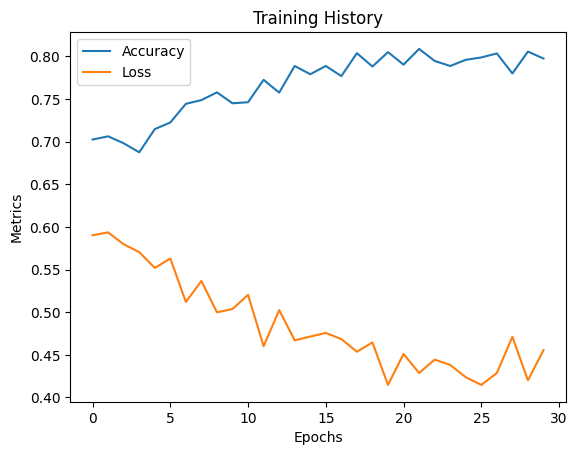

In [21]:
# Evaluate the model on validation data (if available)
# Assuming validation_generator is defined
val_loss, val_accuracy = model_reg_bn.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Optionally plot training history
import matplotlib.pyplot as plt

plt.plot(history_bn.history['accuracy'], label='Accuracy')
plt.plot(history_bn.history['loss'], label='Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [22]:
model_reg_bn.save("cats_and_dogs_small_Assig_06_Prob_2_BatchNorm.h5")

In [25]:

# Model definition with Batch Normalization and L1 regularization
model_bn_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Define optimizer with gradient clipping
optimizer_with_clipnorm = optimizers.RMSprop(
    learning_rate=1e-4,
    clipnorm=1.0,        # Max norm for gradient clipping
    # clipvalue=0.5       # Max value for gradient clipping
)

# Compile the model
model_bn_1.compile(
    loss='binary_crossentropy',
    optimizer=optimizer_with_clipnorm,
    metrics=['accuracy']
)

In [28]:
# Assuming train_generator is already defined as per previous steps
history_bn_1 = model_reg_bn.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8139 - loss: 0.3872 - val_accuracy: 0.7962 - val_loss: 0.4548
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.8059 - loss: 0.4231 - val_accuracy: 0.7625 - val_loss: 0.4834
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8369 - loss: 0.3677 - val_accuracy: 0.8200 - val_loss: 0.3952
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 248ms/step - accuracy: 0.8406 - loss: 0.3695 - val_accuracy: 0.7875 - val_loss: 0.4636
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8270 - loss: 0.3737 - val_accuracy: 0.8206 - val_loss: 0.3961
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 241ms/step - accuracy: 0.8391 - loss: 0.3705 - val_accuracy: 0.8425 - val_loss: 0.3744
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8188 - loss: 0.3943 - val_accuracy: 0.8150 - val_loss: 0.4279
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.8201 - loss: 0.3979 - 

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.4996 - loss: 0.6934
Validation Loss: 0.6933873295783997, Validation Accuracy: 0.5034999847412109


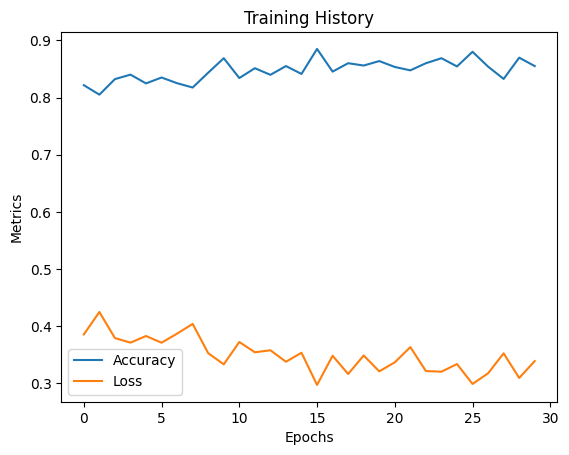

In [29]:
# Evaluate the model on validation data (if available)
# Assuming validation_generator is defined
val_loss, val_accuracy = model_bn_1.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Optionally plot training history
import matplotlib.pyplot as plt

plt.plot(history_bn.history['accuracy'], label='Accuracy')
plt.plot(history_bn.history['loss'], label='Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

### Problem 3: Data Augmentation

In [45]:
train_cats_dir = train_dir+"/cats"

In [46]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

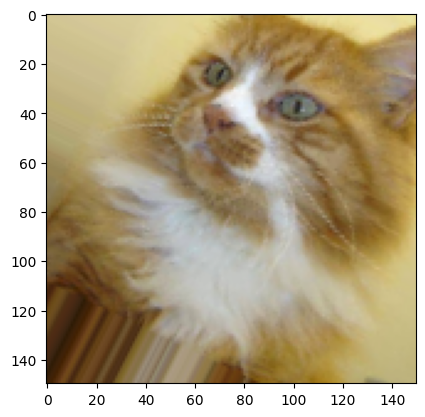

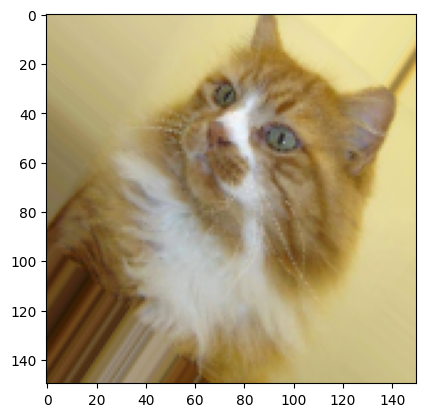

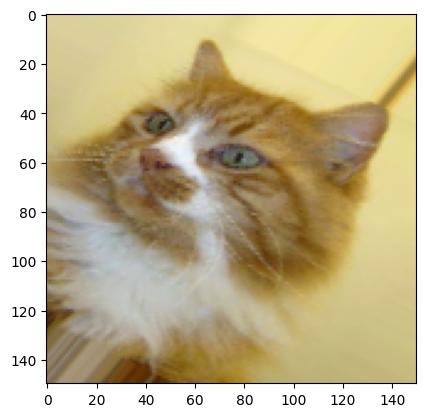

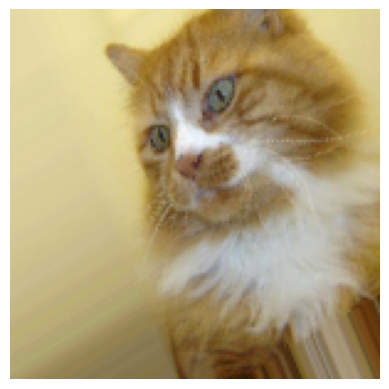

In [48]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [51]:
from keras import regularizers

# Model definition
model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(1, activation='sigmoid')
])


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model_aug.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [55]:
# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_test_datagen.flow_from_directory(val_dir,target_size=(150, 150),
                                                        batch_size=32, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                      batch_size=32, class_mode='binary')


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [57]:

history_aug = model_aug.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 596ms/step - accuracy: 0.5082 - loss: 0.7023 - val_accuracy: 0.4981 - val_loss: 0.6923
Epoch 2/30
 25/100 ━━━━━━━━━━━━━━━━━━━━ 34s 461ms/step - accuracy: 0.5011 - loss: 0.6893

C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.5078 - loss: 0.6898 - val_accuracy: 0.5350 - val_loss: 0.6875
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 636ms/step - accuracy: 0.5418 - loss: 0.6873 - val_accuracy: 0.6081 - val_loss: 0.6699
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.5704 - loss: 0.6716 - val_accuracy: 0.5250 - val_loss: 0.7217
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 615ms/step - accuracy: 0.5690 - loss: 0.6683 - val_accuracy: 0.6219 - val_loss: 0.6408
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.6467 - loss: 0.6255 - val_accuracy: 0.6025 - val_loss: 0.6625
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 622ms/step - accuracy: 0.6149 - loss: 0.6413 - val_accuracy: 0.6400 - val_loss: 0.6315
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.6389 - loss: 0.6370 - val_accuracy: 0.6300 - val_loss: 0.6372
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 668ms/step - accuracy: 0.6369 - loss: 0.6400 - val

In [58]:
model.save('cats_and_dogs_small_2.keras')

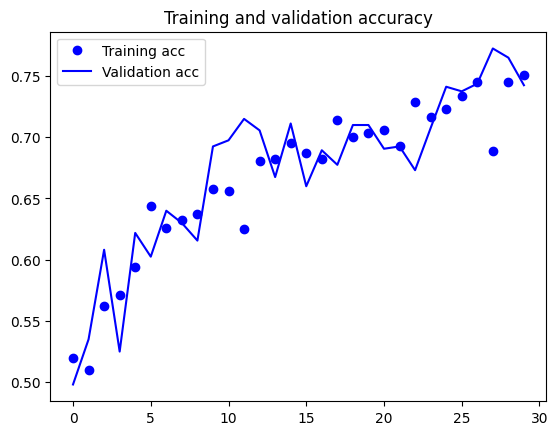

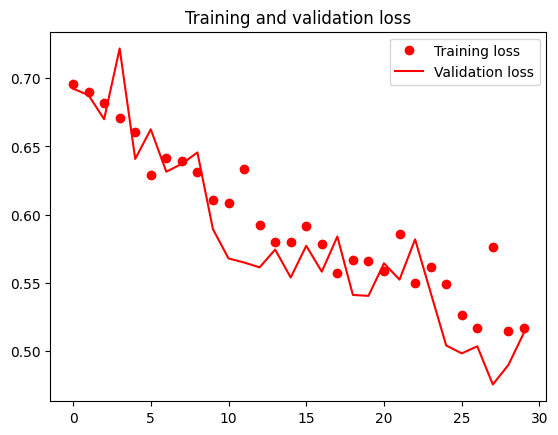

In [60]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()